Keras를 활용한 CNN 실습 2

In [1]:
import numpy as np
import pandas as pd

1. 데이터 불러오기

In [2]:
from tensorflow.keras.datasets import cifar10

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

# 사진의 크기는 32 * 32이며, RGB로 3차원으로 구성된 것을 알 수 있음 (데이터개수, 크기, 크기, 차원)

170508288/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
test_labels.ndim

2

2. CIFAR10 데이터 확인하기

In [ ]:
# 첫번째 이미지 확인

# train_images[0, :, :, :], train_labels[0, :]

In [ ]:
#미리 라벨링을 이름으로 지정

# 데이터 제공측의 설명을 참고한 것
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


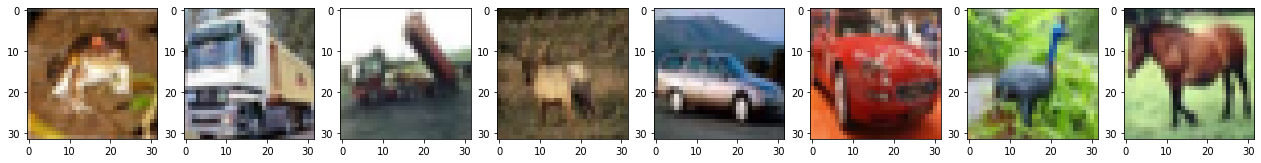

In [ ]:
# 사진으로 데이터 확인 

import matplotlib.pyplot as plt

ncols = 8

figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)

for i in range(ncols):
    axs[i].imshow(train_images[i], cmap='gray')

3. CIFAR10 데이터 전처리

In [ ]:
# 0 ~ 255 사이의 값으로 되어 있는 pixel intensity 값을 0 ~ 1 사이 값으로 변환(표준화)
# label array는 숫자형 값으로 바꾸되, 원-핫 인코딩을 적용할지 선택. 일반적으로 원-핫 인코딩을 적용하는게 Keras Framework활용이 용이
# image array, label array 모두 float32 형으로 변환

In [6]:
# 이미지 값 변환
train_images_2 = np.array(train_images/255.0, dtype=np.float32)
test_images_2 = np.array(test_images/255.0, dtype=np.float32)

# 라벨 값 변환
train_labels_2 = np.array(train_labels, dtype=np.float32)
test_labels_2 = np.array(test_labels, dtype=np.float32)

In [ ]:
# train_images_2[0,:,:,:] #0에서 1사이로 값이 변한 것 확인가능

In [7]:
train_labels.ndim

2

In [12]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
# 이번에는 MNIST와 다르게 레이블 인코딩 방식으로 출력값을 변환 -> 변수가 너무 많으면 원핫으로 하면 1000개의 열이 생김 but 원래는 원핫이 제일 효과가 좋음

# 2차원인 labels 데이터를 1차원으로 변경. -> 근데 이미 01234로 되어있어서 차원만 바꿔준다 = 그냥 대괄호만 풀어준 것이다/
train_labels_2 = train_labels.squeeze()
test_labels_2 = test_labels.squeeze()

# train_labels_2.shape, train_labels.shape

In [11]:
train_labels_2.ndim

1

In [13]:
train_labels_2

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_images_2, train_labels_2, test_size=0.2, random_state=1)

In [ ]:
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000,), (10000,))

4. CNN 모델 생성 및 손실/최적함수 설정

In [ ]:
# CNN Model의 맨처음 Layer는 Input layer. Input layer의 shape를 이미지 사이즈와 RGB 3채널에 맞게 (32, 32, 3) 으로 설정

# Conv->Conv->MaxPooling을 적용하는 루틴으로 모델 생성. MaxPooling을 적용 후에는 필터 갯수를 더욱 증가 시킴
# ->즉, MaxPooling 적용 후에 출력 피처맵의 사이즈는 작아지되, 채널(깊이)는 늘어나는 형태로 모델 생성

# label값이 원-핫 인코딩 되지 않았기 때문에 model.compile()에서 loss는 반드시 sparse_categorical_crossentropy여야함
# 만일 label값이 원-핫 인코딩 되었다면 loss는 categorical_crossentropy

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , MaxPooling2D

In [ ]:
# 이정도만 되어도 많이 깊어진거다, 파라미터 개수만 봐도 알수있음

input_layer = Input(shape=(32, 32, 3)) # 흑백이 아닌 컬러라서 3

# 가장 기본이 conv2번, pooling 1번
conv_layer_1 = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input_layer)
conv_layer_1 = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(conv_layer_1)
conv_layer_1 = MaxPooling2D(pool_size=2)(conv_layer_1)

conv_layer_2 = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv_layer_1)
conv_layer_2 = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv_layer_2)
conv_layer_2 = MaxPooling2D(pool_size=2)(conv_layer_2)

conv_layer_3 = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv_layer_2)
conv_layer_3 = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv_layer_3)
conv_layer_3 = MaxPooling2D(pool_size=2)(conv_layer_3)


# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer는 10으로 설정
output_layer = Flatten(name='flatten')(conv_layer_3)
output_layer = Dense(100, activation='relu')(output_layer)
output_layer = Dropout(rate=0.3)(output_layer)
output_layer = Dense(10, activation='softmax')(output_layer)

##############

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                             

In [ ]:
# 출력값을 원핫인코딩이 아닌 레이블링 인코딩을 해주었기 때문에
# loss는 반드시 sparse_categorical_crossentropy로 지정해주어야 한다.
model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 20

history = model.fit(x=train_x, y=train_y, batch_size=batch_size, epochs=epochs, validation_data=(val_x, val_y))

Epoch 1/20
313/313 [==============================] - 5s 17ms/step - loss: 1.7676 - accuracy: 0.3435 - val_loss: 1.4420 - val_accuracy: 0.4645
Epoch 2/20
313/313 [==============================] - 4s 14ms/step - loss: 1.3063 - accuracy: 0.5282 - val_loss: 1.0825 - val_accuracy: 0.6156
Epoch 3/20
313/313 [==============================] - 4s 13ms/step - loss: 1.0627 - accuracy: 0.6244 - val_loss: 0.9526 - val_accuracy: 0.6605
Epoch 4/20
313/313 [==============================] - 4s 14ms/step - loss: 0.9173 - accuracy: 0.6780 - val_loss: 0.8276 - val_accuracy: 0.7078
Epoch 5/20
313/313 [==============================] - 4s 14ms/step - loss: 0.7997 - accuracy: 0.7198 - val_loss: 0.8198 - val_accuracy: 0.7050
Epoch 6/20
313/313 [==============================] - 4s 14ms/step - loss: 0.7119 - accuracy: 0.7519 - val_loss: 0.7132 - val_accuracy: 0.7489
Epoch 7/20
313/313 [==============================] - 4s 14ms/step - loss: 0.6314 - accuracy: 0.7811 - val_loss: 0.7213 - val_accuracy: 0.7558

5. 테스트 데이터를 통한 성능 평가

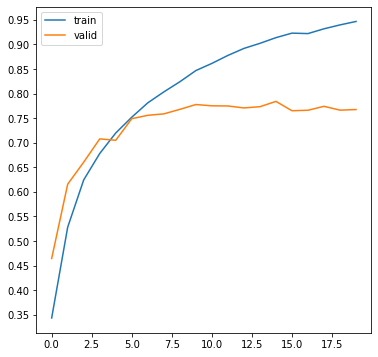

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.yticks(np.arange(0, 1, 0.05))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

In [ ]:
# 테스트 데이터로 성능 평가
model.evaluate(test_images_2, test_labels_2)

313/313 [==============================] - 1s 3ms/step - loss: 1.1471 - accuracy: 0.7613


[1.147078037261963, 0.7613000273704529]

In [ ]:
# 1. 한개의 값만 예측하고 싶을 때

# 테스트용 4차원 이미지 배열을 입력해서 predict()수행. 
# predict()의 결과는 softmax 적용 결과임. 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의 

preds = model.predict(np.expand_dims(test_images_2[0], axis=0))
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds.argmax())

#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

예측 결과 shape: (1, 10)
예측 결과: 3


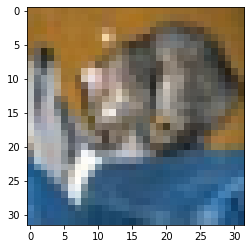

In [ ]:
plt.imshow(test_images_2[0])

In [ ]:
pred_y=model.predict(test_images_2).argmax(axis=1)
print(pred_y[:5])
print(test_labels_2[:5])

#['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

[3 8 8 0 6]
[3 8 8 0 6]


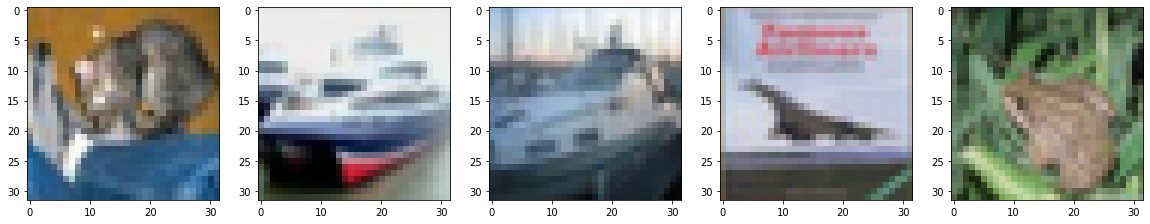

In [ ]:
# 여러개의 그림을 한번에 표현하기

ncols = 5

figure, axs = plt.subplots(figsize=(20, 20), nrows=1, ncols=ncols) # subplots함수는 여러개의 그림을 한번에 표현하도록 도와줌

for i in range(ncols):
    axs[i].imshow(test_images_2[i], cmap='gray')

    